In [5]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

In [6]:
# create spark session
spark = SparkSession.builder.appName("SparkWordCountPrograms").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/09 18:18:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/09 18:18:07 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/02/09 18:18:07 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [7]:
# read text file
df_text_file = spark.read.text("/home/sparkuser/data/my_poem.txt")
df_text_file.show()

+--------------------+
|               value|
+--------------------+
|    Once upon a time|
|I caught a little...|
|                    |
|I set it on the f...|
|but it ran right ...|
|                    |
|I chased it on my...|
|but it melted to ...|
|                    |
|I scooped it up i...|
|but it turned int...|
|                    |
|I caught it by th...|
|but it stretched ...|
|                    |
|I followed it in ...|
|but it changed in...|
|                    |
|When I fed it tin...|
|it became a tall ...|
+--------------------+
only showing top 20 rows



In [8]:
df_total_words = df_text_file.withColumn('wordCount', f.size(f.split(f.col('value'), ' ')))
df_total_words.show()

+--------------------+---------+
|               value|wordCount|
+--------------------+---------+
|    Once upon a time|        4|
|I caught a little...|        5|
|                    |        1|
|I set it on the f...|        6|
|but it ran right ...|        7|
|                    |        1|
|I chased it on my...|        6|
|but it melted to ...|        6|
|                    |        1|
|I scooped it up i...|        7|
|but it turned int...|        6|
|                    |        1|
|I caught it by th...|        6|
|but it stretched ...|        6|
|                    |        1|
|I followed it in ...|        6|
|but it changed in...|        6|
|                    |        1|
|When I fed it tin...|        7|
|it became a tall ...|        5|
+--------------------+---------+
only showing top 20 rows



>PySpark function explode(e: Column) is used to explode or create array or map columns to rows. When an array is passed to this function, it creates a new default column “col1” and it contains all array elements

In [9]:
# Word count example
df_word_count = df_text_file.withColumn('word', f.explode(f.split(f.col('value'), ' '))).groupBy('word').count().sort('count', ascending=False)
df_word_count.show()

[Stage 2:>                                                          (0 + 1) / 1]

+----------+-----+
|      word|count|
+----------+-----+
|        it|   13|
|         a|    8|
|         I|    7|
|          |    7|
|       but|    5|
|      into|    4|
|       the|    3|
|        in|    2|
|       out|    2|
|        on|    2|
|        my|    2|
|       and|    2|
|    caught|    2|
|       set|    1|
|        by|    1|
|      grew|    1|
|       tin|    1|
|      flew|    1|
|skyscraper|    1|
|    turned|    1|
+----------+-----+
only showing top 20 rows



In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.2 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-scri

>Note: After we install any package with Magic command (i.e. !), we need to restart the kernel to make module available for use.

In [10]:
from wordcloud import WordCloud

>I have installed the pandas package from spark container backend

In [18]:
import pandas as pd

### The PySpark columns are not iterable, that's why we need to convert spark dataframe into pandas dataframe.


Solution: https://www.geeksforgeeks.org/convert-pyspark-dataframe-to-dictionary-in-python/

In [19]:
p_df = df_word_count.toPandas()

In [20]:
# Convert DataFrame to a dictionary
word_count_dict = dict(zip(p_df['word'], p_df['count']))

print(word_count_dict)

{'it': 13, 'a': 8, 'I': 7, '': 7, 'but': 5, 'into': 4, 'the': 3, 'in': 2, 'out': 2, 'on': 2, 'my': 2, 'and': 2, 'caught': 2, 'set': 1, 'by': 1, 'grew': 1, 'tin': 1, 'flew': 1, 'skyscraper': 1, 'turned': 1, 'melted': 1, 'kite': 1, 'door': 1, 'cat': 1, 'sight...': 1, 'paper': 1, 'tail': 1, 'far': 1, 'fed': 1, 'boat': 1, 'became': 1, 'stretched': 1, 'Once': 1, 'followed': 1, 'tall': 1, 'whale': 1, 'up': 1, 'upon': 1, 'rhyme': 1, 'scooped': 1, 'floor': 1, 'of': 1, 'an': 1, 'hat': 1, 'time': 1, 'chased': 1, 'right': 1, 'Then': 1, 'When': 1, 'to': 1, 'little': 1, 'changed': 1, 'ran': 1, 'icicle': 1, 'goat': 1, 'bicycle': 1}


In [24]:
# Create a WordCloud object
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width=800, height=400, background_color='black')

In [25]:
# Generate the word cloud using the word-count dictionary
wordcloud.generate_from_frequencies(frequencies=word_count_dict)

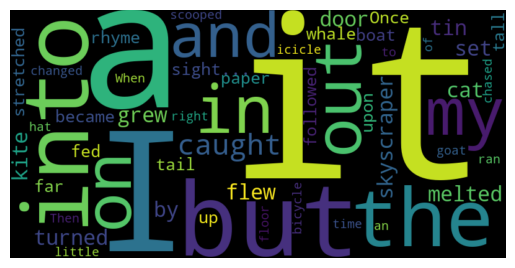

In [26]:
# Display the generated Word Cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()